In [13]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2
from PIL import Image

In [14]:
%matplotlib inline

In [15]:
dataset_path = 'YaleDataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

In [16]:
import random

random.seed(0)
  
# declaring list
list = [2, 2, 4, 6, 6, 8]
  
# initializing the value of n
n = 4
  
# printing n elements from list
print(random.sample(list, n))

[6, 8, 2, 2]


In [17]:
# training_im, testing_im, training_label, testing_label = [], [], [], []
# types = ["centerlight", "glasses", "happy", "leftlight", "noglasses","normal", "rightlight", "sad", "sleepy", "surprised", "wink"]
# for i in range(1,16):
#     im = {}
#     testing_type = random.choice(types)
#     for t in types:
#         im[t] = np.array(Image.open(path_to_folder+"YaleDataset/subject"+str(i).zfill(2)+"."+t),'uint8')
#         im[t] = cv2.resize(im[t], im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
#         if t == testing_type:
#             testing_im.append(im[t])
#             testing_label.append(i)
#         else:
#             training_im.append(im[t])
#             training_label.append(i)

In [20]:
training_pics_address = training_pics
testing_pics_address = testing_pics

def load_images():
    im_size=(64,64)
    training_im, testing_im, training_label, testing_label = [], [], [], []
    types = ["centerlight", "glasses", "happy", "leftlight", "noglasses","normal", "rightlight", "sad", "sleepy", "surprised", "wink"]
    for i in range(1,16):
        im = {}
        testing_type = random.choice(types)
        for t in types:
            im[t] = np.array(Image.open("YaleDataset/subject"+str(i).zfill(2)+"."+t),'uint8')
            im[t] = cv2.resize(im[t], im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
            if t == testing_type:
                testing_im.append(im[t])
                testing_label.append(i)
            else:
                training_im.append(im[t])
                training_label.append(i)
    
    return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)
    
training_im, training_label, testing_im, testing_label = load_images()

IndexError: index 149 is out of bounds for axis 0 with size 149

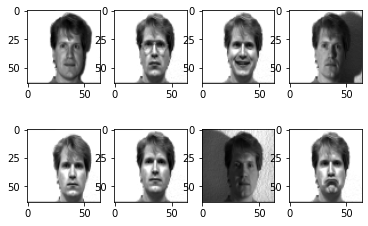

In [22]:
training_tensor = np.ndarray(shape=(len(training_pics_address), 64*64), dtype=np.float64)

for i in range(len(training_im)):
    training_tensor[i,:] = np.array(training_im[i], dtype='float64').flatten()
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(training_im[i], cmap='gray')
plt.show()

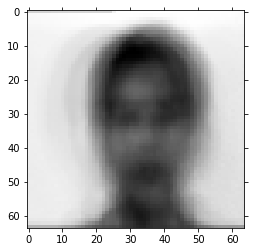

In [23]:
mean_face = np.zeros((1,64*64))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(training_pics_address))).flatten()

plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [24]:
height = 64
width = 64

normalised_training_tensor = np.ndarray(shape=(len(training_pics_address), height*width))

for i in range(len(training_pics_address)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

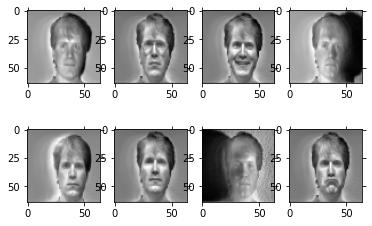

In [25]:
plt.clf()
for i in range(len(training_pics_address)):
    img = normalised_training_tensor[i].reshape(height,width)
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# EIGENVECTORS AND VALUES USING SVD

In [26]:
len(training_pics_address)
!ls CroppedYale

yaleB01  yaleB06  yaleB11  yaleB17  yaleB22  yaleB27  yaleB32  yaleB37
yaleB02  yaleB07  yaleB12  yaleB18  yaleB23  yaleB28  yaleB33  yaleB38
yaleB03  yaleB08  yaleB13  yaleB19  yaleB24  yaleB29  yaleB34  yaleB39
yaleB04  yaleB09  yaleB15  yaleB20  yaleB25  yaleB30  yaleB35
yaleB05  yaleB10  yaleB16  yaleB21  yaleB26  yaleB31  yaleB36


In [27]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,len(training_pics_address))
print(cov_matrix.shape)
print('Covariance matrix of X: \n%s' %cov_matrix)

(149, 149)
Covariance matrix of X: 
[[ 1.62234095e+01  5.44449111e+00  5.54475380e+00 ... -1.06579103e+01
   1.18536025e+00 -2.86159326e+00]
 [ 5.44449111e+00  9.06732775e+00  8.16940283e+00 ... -3.61020540e+00
   1.00009638e+00  3.01084099e-02]
 [ 5.54475380e+00  8.16940283e+00  9.66783042e+00 ... -3.87476250e+00
   5.23092487e-01  6.27821239e-01]
 ...
 [-1.06579103e+01 -3.61020540e+00 -3.87476250e+00 ...  4.24816409e+01
   2.29002661e+00  2.57808408e+00]
 [ 1.18536025e+00  1.00009638e+00  5.23092487e-01 ...  2.29002661e+00
   1.30784107e+01  2.28348448e+00]
 [-2.86159326e+00  3.01084099e-02  6.27821239e-01 ...  2.57808408e+00
   2.28348448e+00  2.24725881e+01]]


In [28]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.06004883+0.j          0.01870065+0.j         -0.04462933+0.j
  ... -0.00045102+0.j          0.00078459+0.00164991j
   0.00078459-0.00164991j]
 [-0.02348371+0.j         -0.00202064+0.j         -0.04699098+0.j
  ... -0.00045102+0.j          0.00078459+0.00164991j
   0.00078459-0.00164991j]
 [-0.02165991+0.j         -0.00874299+0.j         -0.04417352+0.j
  ... -0.00045102+0.j          0.00078459+0.00164991j
   0.00078459-0.00164991j]
 ...
 [ 0.14314938+0.j         -0.00379877+0.j         -0.09931019+0.j
  ... -0.00045102+0.j          0.00078459+0.00164991j
   0.00078459-0.00164991j]
 [-0.00757612+0.j         -0.08785349+0.j         -0.00800896+0.j
  ... -0.00045102+0.j          0.00078459+0.00164991j
   0.00078459-0.00164991j]
 [ 0.0329012 +0.j         -0.08368284+0.j          0.03861149+0.j
  ... -0.00045102+0.j          0.00078459+0.00164991j
   0.00078459-0.00164991j]]

Eigenvalues of Cov(X): 
[ 1.35781253e+03+0.00000000e+00j  4.85632291e+02+0.00000000e+0

In [29]:
eigenvectors.shape

(149, 149)

In [30]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Cumulative proportion of variance explained vector: 
[0.35656204+0.00000000e+00j 0.48408925+0.00000000e+00j
 0.57322345+0.00000000e+00j 0.62831625+0.00000000e+00j
 0.67541321+0.00000000e+00j 0.70950114+0.00000000e+00j
 0.73836314+0.00000000e+00j 0.76326655+0.00000000e+00j
 0.78440072+0.00000000e+00j 0.79944904+0.00000000e+00j
 0.81333755+0.00000000e+00j 0.82498662+0.00000000e+00j
 0.83502005+0.00000000e+00j 0.84437964+0.00000000e+00j
 0.85328654+0.00000000e+00j 0.86160073+0.00000000e+00j
 0.86895294+0.00000000e+00j 0.87580493+0.00000000e+00j
 0.88262216+0.00000000e+00j 0.88822738+0.00000000e+00j
 0.89356114+0.00000000e+00j 0.89857302+0.00000000e+00j
 0.90303102+0.00000000e+00j 0.90733859+0.00000000e+00j
 0.91127114+0.00000000e+00j 0.91501007+0.00000000e+00j
 0.91848782+0.00000000e+00j 0.92169383+0.00000000e+00j
 0.92470178+0.00000000e+00j 0.92755523+0.00000000e+00j
 0.93026975+0.00000000e+00j 0.93295198+0.00000000e+00j
 0.93545708+0.00000000e+00j 0.93782371+0.00000000e+00j
 0.94004063+

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


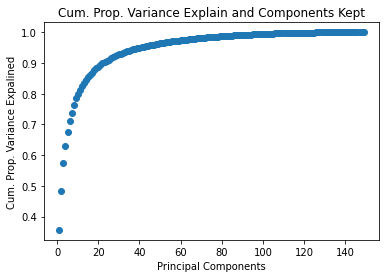

In [31]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [32]:
reduced_data = np.array(eigvectors_sort[:8]).transpose()

In [33]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

TypeError: Image data of dtype complex128 cannot be converted to float

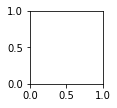

In [34]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    if i < 8:
        plt.subplot(2,4,1+i)
        plt.imshow(img, cmap='jet')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [35]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])

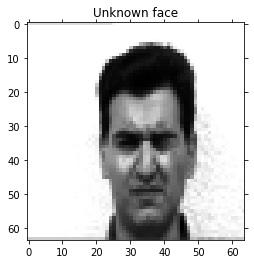

In [36]:
unknown_face        = testing_im[-1]
# unknown_face        = plt.imread('Dataset/subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

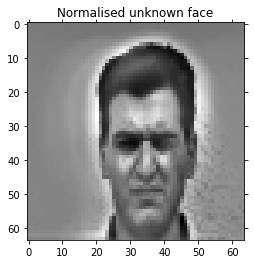

In [37]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [38]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([-4.55495161e+07+0.j, -1.24555699e+08+0.j, -1.76974656e+07+0.j,
        3.67255666e+07+0.j, -1.46848330e+07+0.j, -8.96844090e+07+0.j,
       -5.13947978e+07+0.j,  5.52863861e+06+0.j])

In [39]:
diff = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)

[1.70185391e+08 1.56800174e+08 1.56596400e+08 2.29041850e+08
 1.72063941e+08 1.58390145e+08 2.65203398e+08 1.56955761e+08
 1.59280277e+08 1.61394873e+08 1.75318818e+08 1.66112212e+08
 2.29383339e+08 1.80513584e+08 1.80513584e+08 2.02715164e+08
 1.80096467e+08 1.79779350e+08 1.76518142e+08 1.73174142e+08
 1.50599545e+08 1.47295811e+08 1.58617886e+08 2.26834135e+08
 1.57976317e+08 2.64953593e+08 1.55644648e+08 1.56531557e+08
 1.68134369e+08 1.57452080e+08 1.58647412e+08 1.63917042e+08
 2.14948364e+08 1.59432221e+08 1.68033719e+08 2.53553435e+08
 1.68033719e+08 1.66353267e+08 1.63057443e+08 1.61148854e+08
 1.64456161e+08 1.58543338e+08 2.23033889e+08 1.60605296e+08
 1.58095202e+08 2.62815711e+08 1.57243922e+08 1.57417363e+08
 1.61002483e+08 1.58924196e+08 2.32546706e+08 2.97971043e+08
 2.83692591e+08 2.31327461e+08 2.81803915e+08 2.81803915e+08
 2.78889499e+08 2.89371767e+08 2.89107854e+08 2.96668117e+08
 1.50883198e+08 1.62353843e+08 1.48110797e+08 2.12450269e+08
 1.57079103e+08 2.395109

In [40]:
w.shape

(149, 8)

In [41]:
correct_pred = 0
def recogniser(curr_testing_im, curr_testing_label, proj_data, w):
    global count, num_images, correct_pred
    unknown_face_vector = np.array(curr_testing_im, dtype='float64').flatten()
    normalised_uface_vector = unknown_face_vector-mean_face
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    t0 = 88831687
    
    if norms[index] < t1 or True:
#         print

        if norms[index] < t0 or True: # It's a face
            print("=====================")
            print(curr_testing_label)
            print(training_label[index])
            print("=====================")
            if curr_testing_label == training_label[index]:
#                 plt.title('Matched:'+'.'.join(training_label[index]), color='g')
#                 plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
#             else:
#                 plt.title('Matched:'+'.'.join(training_label[index]), color='g')
#                 plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
#                 plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
#         else:
#             if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
#                 plt.title('Unknown face!', color='g')
#                 correct_pred += 1
#             else:
#                 plt.title('Unknown face!', color='r')
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
#         plt.subplots_adjust(right=1.2, top=2.5)
    
#     else:     
# #         plt.subplot(9,4,1+count)
# #         if len(img.split('.')) == 3:
#             pass
# #             plt.title('Not a face!', color='r')
#         else:
# #             plt.title('Not a face!', color='g')
#             correct_pred += 1
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    

# fig = plt.figure(figsize=(15, 15))
for idx, curr_testing_im in enumerate(testing_im):
    recogniser(curr_testing_im, testing_label[idx], proj_data, w)

# plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, testing_im.shape[0], correct_pred/testing_im.shape[0]*100))

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
3
11
11
12
1
13
13
14
14
15
15
Correct predictions: 13/15 = 86.66666666666667%


In [42]:
print(len(training_im))

150
